In [1]:
hearts = [str(i) + 'H' for i in range(6,15)]
clubs = [str(i) + 'D' for i in range(2,15)]
spades = [str(i) + 'S' for i in range(2,15)]
diamonds = [str(i) + 'D' for i in range(2,15)]


In [1]:
from pprint import pprint as pp

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import argparse
import imutils
import glob

In [3]:
suits = ['H', 'C', 'S', 'D']

cards = [str(i) + str(j) for j in suits for i in range(7,15)]

In [4]:
suitslist = ['hearts', 'clubs', 'spades', 'diamonds']

In [5]:
import os

In [9]:
os.listdir('.')

['hand_tally_script.py',
 'fxns.ipynb',
 'get_cracks.ipynb',
 'eda.ipynb',
 'text.html',
 '2268600_2270000',
 'smalldfs.ipynb',
 '2268010_2268200',
 '.DS_Store',
 'handler.py',
 '2256003_2256006',
 '2277000_2280000',
 'scratch.ipynb',
 'res14D.png.png',
 '11C.png',
 '2290000_2293000',
 '2282000_2284000',
 'get61_functions.ipynb',
 'hand_tally.ipynb',
 '10S.png',
 'leaderboard_scraper.ipynb',
 'cvimg.ipynb',
 '2287000_2290000',
 '2256000_2256009',
 'res11C.png.png',
 '__pycache__',
 'get_hand.ipynb',
 '2270000_2272000',
 '2289000_2293000',
 '2293000_2296000',
 'res10S.png.png',
 '2296000_2330000',
 'scrapers.py',
 'contacts.txt',
 'players.py',
 'message.txt',
 '2284000_2285000',
 'score_table.py',
 '2268200_2268600',
 'emailer.py',
 '2296000_2397000',
 'manyhands.ipynb',
 'scrape code.py',
 '2card_test.png',
 '2256006_2256009',
 '.ipynb_checkpoints',
 'selenscrape.py',
 '2280000_2282000',
 '2274000_2277000',
 'get61imgs',
 '14D.png',
 'get61',
 '2285000_2287000',
 '.vscode',
 '2256000_

In [23]:
import pyscreenshot as ImageGrab

In [24]:
# im = ImageGrab.grab()
# im.show()

In [25]:
im=ImageGrab.grab(bbox=(140,120,950,760))
im.show()

In [26]:
im.save('imtest.png')

In [39]:
#cardimages = ['get61imgs/13C.png', 'get61imgsorig/13C.png', 'get61img81x100/13C.png']
#cardimages = os.listdir('get61imgs')
#cardimages = ['get61imgsorig/13S.png']
#cardimages = ['13C.png']
cardimages = os.listdir('get61img81x100')

In [40]:
cardimages

['7C.png',
 '9H.png',
 '8H.png',
 '7D.png',
 '7S.png',
 '14H.png',
 '11C.png',
 '10D.png',
 '10S.png',
 '13H.png',
 '11D.png',
 '12H.png',
 '11S.png',
 '10C.png',
 '13C.png',
 '11H.png',
 '12S.png',
 '12D.png',
 '13S.png',
 '10H.png',
 '13D.png',
 '12C.png',
 '9C.png',
 '7H.png',
 '14S.png',
 '14D.png',
 '8S.png',
 '8D.png',
 '14C.png',
 '9S.png',
 '9D.png',
 '8C.png']

In [22]:
cards = []
for i in cardimages:
    img_rgb = cv2.imread('im.png')
    #print(i)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    template = cv2.imread('get61imgs/{}'.format(i),0)
    #template = cv2.Canny(template, 50, 200)
    #template = cv2.imread('{}'.format(i),0)
    w, h = template.shape[::-1]

    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.90

    cv2.imwrite('i.png', template)
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    cv2.imwrite('kingclubs.png', template)
    # cv2.imwrite('found_cards/reser{}.png'.format(i),img_rgb)
    # if not cv2.imwrite('reser{}.png'.format(i), img_gray):
    #     raise Exception("Could not write image")
    if any(map(len, loc)):
        cards.append(i)
        cv2.imwrite('found_cards/res{}.png'.format(i),img_rgb)

In [21]:
cards

[]

In [55]:
retval = os.getcwd()
print(retval)

/Users/adsweeney/PycharmProjects/get61


In [ ]:
scale_percent = 50
width = int(img_rgb.shape[1] * scale_percent / 100)
height = int(img_rgb.shape[0] * scale_percent / 100)
dim = (width, height)


In [65]:


cards = []
for i in cardimages:
    img = cv2.imread('im.png')
    scale_percent = 50
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    img_rgb = cv2.resize(img, dim)
    #print(i)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    template = cv2.imread('get61img81x100/{}'.format(i),0)
    w, h = template.shape[::-1]

    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.93

    cv2.imwrite('i.png', template)
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

    #cv2.imwrite('found_cards/res{}.png'.format(i),img_gray)
    # if not cv2.imwrite('res{}.png'.format(i), img_gray):
    #     raise Exception("Could not write image")
    if any(map(len, loc)):
        cards.append(i)
        cv2.imwrite('found_cards/res{}.png'.format(i),img_rgb)

In [49]:
cards

['7C.png', '11D.png', '11S.png', '7H.png', '9S.png']

In [56]:
cards= []
img = cv2.imread('im.png')
scale_percent = 50
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

img_rgb = cv2.resize(img, dim)
#print(i)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('get61img81x100/7H.png'.format(i),0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.94

cv2.imwrite('i.png', template)
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

#cv2.imwrite('found_cards/res{}.png'.format(i),img_gray)
# if not cv2.imwrite('res{}.png'.format(i), img_gray):
#     raise Exception("Could not write image")
if any(map(len, loc)):
    cards.append('7H')
    cv2.imwrite('found_cards/testing.png'.format(i),img_rgb)

In [57]:
cards

['7H']

In [2]:
#### RED GREEN BLUE IMAGE SPLITTING

src = 'im.png'
input_image = cv2.imread(src)
blue, green, red = cv2.split(input_image)

In [3]:
# We create a dummy 3D array
blue_channel = np.zeros(input_image.shape, input_image.dtype)
green_channel = np.zeros(input_image.shape, input_image.dtype)
red_channel = np.zeros(input_image.shape, input_image.dtype)

# We match each color channel to a 3D dimension:
    # Blue Rendering : [blue; 0; 0]
    # Green Rendering: [0; green; 0]
    # Red Rendering: [0; 0; red]
cv2.mixChannels([blue, green, red], [blue_channel], [0,0])
cv2.mixChannels([blue, green, red], [green_channel], [1,1])
cv2.mixChannels([blue, green, red], [red_channel], [2,2])

# Display the three obtained images
cv2.imshow('Blue Channel', blue_channel)
cv2.imshow('Green Channel', green_channel)
cv2.imshow('Red Channel', red_channel)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [253, 209, 208],
        [245,  33,   0],
        [245,  33,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [253, 209, 208],
        [245,  33,   0],
        [245,  33,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [253, 209, 208],
        [245,  33,   0],
        [245,  33,   0]],

       ...,

       [[ 57,  92, 122],
        [ 55,  91, 121],
        [ 57,  92, 123],
        ...,
        [ 62, 102, 145],
        [ 60, 100, 143],
        [ 59,  99, 142]],

       [[ 60,  93, 124],
        [ 59,  93, 123],
        [ 60,  94, 124],
        ...,
        [ 60, 100, 143],
        [ 59,  99, 142],
        [ 59,  99, 142]],

       [[ 62,  94, 125],
        [ 61,  94, 124],
        [ 61,  94, 124],
        ...,
        [ 59,  99, 141],
        [ 60, 100, 142],
        [ 61, 100, 142]]

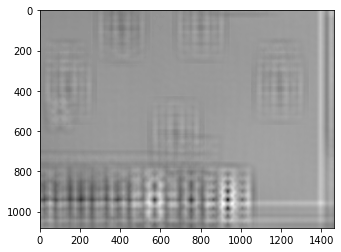

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv2.imread('im.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('get61imgs/10S.png', 0)

height, width = template.shape[::]

res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
plt.imshow(res, cmap='gray')

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
bottom_right = (top_left[0] + width, top_left[1] + height)
cv2.rectangle(img_rgb, top_left, bottom_right, (255, 0, 0), 2) 

# cv2.imshow("Matched image", img_rgb)
# cv2.waitKey()
# cv2.destroyAllWindows()


In [2]:
top_left

(933, 940)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
cardimages = os.listdir('get61imgs')

In [3]:
cards = []
for i in cardimages:
    img_rgb = cv2.imread('im.png')
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    template = cv2.imread('get61imgs/{}'.format(i), 0)

    height, width = template.shape[::]

    res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
    plt.imshow(res, cmap='gray')

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
    bottom_right = (top_left[0] + width, top_left[1] + height)
    cv2.rectangle(img_rgb, top_left, bottom_right, (255, 0, 0), 2) 
    
    #cv2.imshow("Matched image", img_rgb)
    # cv2.waitKey()
    # cv2.destroyAllWindows()


NameError: name 'cardimages' is not defined

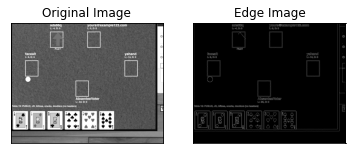

In [58]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('im.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [59]:
blurred_img = cv2.blur(img,ksize=(5,5))
med_val = np.median(img) 
lower = int(max(0 ,0.7*median_pix))
upper = int(min(255,1.3*median_pix))
edges = cv2.Canny(image=img, threshold1=lower,threshold2=upper)

NameError: name 'median_pix' is not defined

In [63]:
from SimpleCV import Image

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('unit test')? (base.py, line 139)

In [62]:

# Make a function that does a half and half image.
def halfsies(left,right): 
    result = left
    # crop the right image to be just the right side.
    crop   = right.crop(right.width/2.0,0,right.width/2.0,right.height)
    # now paste the crop on the left image.
    result = result.blit(crop,(left.width/2,0))
    # return the results.
    return result
# Load an image from imgur.
img = Image('im.png')
# create an edge image using the Canny edge detector
# set the first threshold to 160
output = img.edges(t1=160)
# generate the side by side image.
result = halfsies(img,output)
# show the results.
result.show()
# save the output images. 
result.save('juniperedges.png')

NameError: name 'Image' is not defined